In [1]:
## SETUP.PY

In [2]:
# import modules
import math
import numpy as np
from scipy.sparse import diags
from scipy.linalg import lu, solve
import matplotlib.pyplot as plt

#### Define True Solution

In [3]:
# Constants
L = 120
S = 1000
q = 100 / 12
E = 3.0e7
I = 625

In [4]:
# define w(x)
def w(x):   
    # Variables
    c = (-q * E * I) / (S ** 2)
    a = math.sqrt( (S) / (E * I) )
    b = (-q) / (2 * S)
    c1 = c * ( 1 - math.e ** ( -a * L ) ) / ( math.e ** ( -a * L ) - math.e ** (a * L) )
    c2 = c * ( math.e ** (a * L) - 1 ) / ( math.e ** ( -a * L ) - math.e ** (a * L) )
    
    return c1 * math.e ** (a * x) + c2 * math.e ** (-a * x) + b * x * (x - L) + c

In [5]:
# set up A and b
def setup(n):
    # Constants
    L = 120
    S = 1000
    q = 100 / 12
    E = 3.0e7
    I = 625
    Q = S / (E * I)
    R = q / (2 * E * I)
    
    # Compute step size
    h = L / n
    d = 2 + h**2 * Q

    # calulate h^2 and h^-2 for parts 3 and 4
    h_sq = h ** 2
    h_sq_inv = h ** (-2)
    
    # Adjust n
    n -= 1
    
    # Construct A matrix
    e = np.ones(n)
    diagonals = [-e, d * e, -e]
    offsets = [-1, 0, 1]
    A = diags(diagonals, offsets, shape=(n, n)).toarray()
    
    # Define r function
    r = lambda x: R * x * (x - L)
    
    # Compute b vector
    x = np.linspace(h, L - h, n)
    b = -h**2 * r(x)
    
    return A, b, h_sq, h_sq_inv

Y True = [0.         0.00085493 0.00119991 0.00085493 0.        ]

Y = [0.         0.00089993 0.0012599  0.00089993 0.        ]



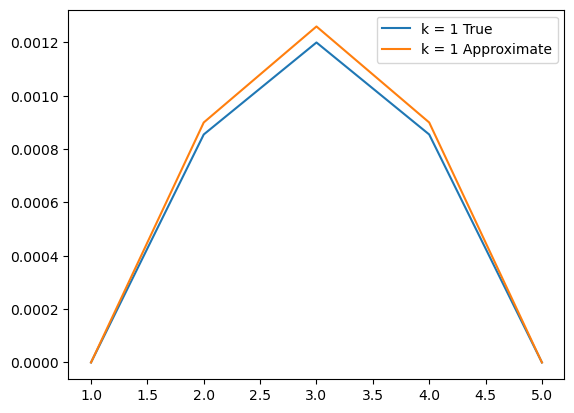

Error: [0.00119991 0.05324565 0.07502382 0.05324565 0.00119991]



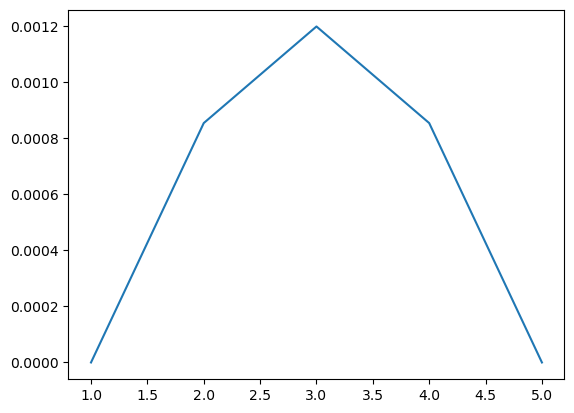

Y True = [0.         0.0004659  0.00085493 0.00111085 0.00119991 0.00111085
 0.00085493 0.0004659  0.        ]

Y = [0.         0.00047246 0.00086618 0.00112491 0.0012149  0.00112491
 0.00086618 0.00047246 0.        ]



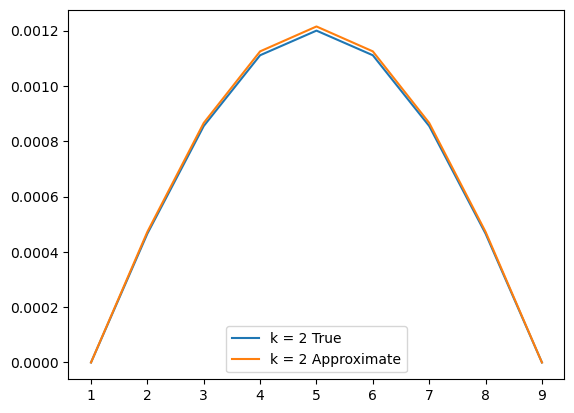

Error: [0.00119991 0.02738411 0.0512041  0.06685722 0.07230178 0.06685722
 0.0512041  0.02738411 0.00119991]



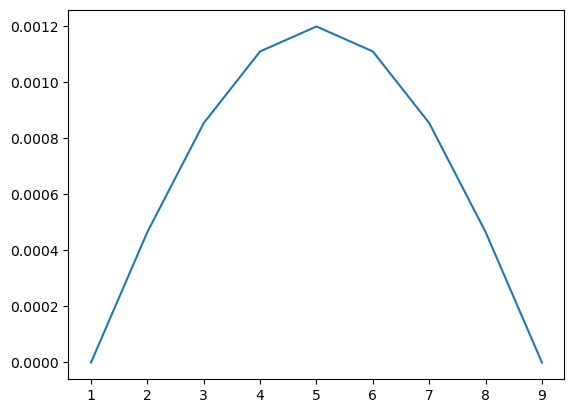

Y True = [0.         0.00023817 0.0004659  0.00067407 0.00085493 0.00100217
 0.00111085 0.00117747 0.00119991 0.00117747 0.00111085 0.00100217
 0.00085493 0.00067407 0.0004659  0.00023817 0.        ]

Y = [0.         0.00023904 0.00046754 0.00067635 0.00085775 0.00100539
 0.00111437 0.00118116 0.00120366 0.00118116 0.00111437 0.00100539
 0.00085775 0.00067635 0.00046754 0.00023904 0.        ]

Error: [0.00119991 0.01326226 0.02708638 0.0397195  0.05069371 0.05962621
 0.06621924 0.07026012 0.07162126 0.07026012 0.06621924 0.05962621
 0.05069371 0.0397195  0.02708638 0.01326226 0.00119991]



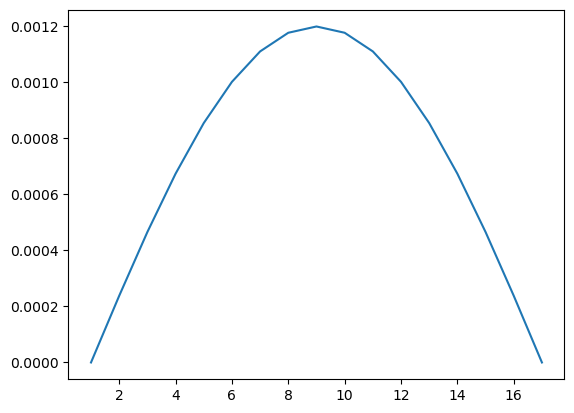

Y True = [0.         0.00011976 0.00023817 0.00035394 0.0004659  0.00057295
 0.00067407 0.00076834 0.00085493 0.0009331  0.00100217 0.00106158
 0.00111085 0.00114958 0.00117747 0.00119429 0.00119991 0.00119429
 0.00117747 0.00114958 0.00111085 0.00106158 0.00100217 0.0009331
 0.00085493 0.00076834 0.00067407 0.00057295 0.0004659  0.00035394
 0.00023817 0.00011976 0.        ]

Y = [0.         0.00011987 0.00023838 0.00035426 0.00046631 0.00057344
 0.00067464 0.00076898 0.00085564 0.00093385 0.00100297 0.00106243
 0.00111173 0.00115049 0.00117839 0.00119522 0.00120084 0.00119522
 0.00117839 0.00115049 0.00111173 0.00106243 0.00100297 0.00093385
 0.00085564 0.00076898 0.00067464 0.00057344 0.00046631 0.00035426
 0.00023838 0.00011987 0.        ]

Error: [0.00119991 0.00605245 0.01322238 0.02023281 0.02701195 0.03349334
 0.03961582 0.04532359 0.05056611 0.05529821 0.05948    0.06307693
 0.06605974 0.06840452 0.07009265 0.07111085 0.07145114 0.07111085
 0.07009265 0.06840452 0.06605974 0.06

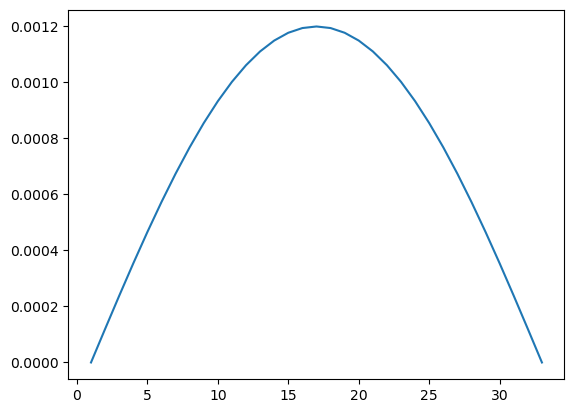

Y True = [0.00000000e+00 5.99663181e-05 1.19760080e-04 1.79213734e-04
 2.38165288e-04 2.96458136e-04 3.53941257e-04 4.10469103e-04
 4.65901598e-04 5.20104164e-04 5.72947698e-04 6.24308683e-04
 6.74068957e-04 7.22116005e-04 7.68342608e-04 8.12647195e-04
 8.54933693e-04 8.95111414e-04 9.33095260e-04 9.68805543e-04
 1.00216814e-03 1.03311441e-03 1.06158116e-03 1.08751073e-03
 1.11085092e-03 1.13155507e-03 1.14958195e-03 1.16489592e-03
 1.17746671e-03 1.18726960e-03 1.19428543e-03 1.19850042e-03
 1.19990631e-03 1.19850042e-03 1.19428543e-03 1.18726963e-03
 1.17746671e-03 1.16489592e-03 1.14958195e-03 1.13155507e-03
 1.11085092e-03 1.08751073e-03 1.06158116e-03 1.03311441e-03
 1.00216814e-03 9.68805543e-04 9.33095260e-04 8.95111414e-04
 8.54933693e-04 8.12647195e-04 7.68342608e-04 7.22116005e-04
 6.74069015e-04 6.24308683e-04 5.72947727e-04 5.20104164e-04
 4.65901598e-04 4.10469103e-04 3.53941257e-04 2.96458165e-04
 2.38165288e-04 1.79213734e-04 1.19760080e-04 5.99663181e-05
 0.00000000e+00

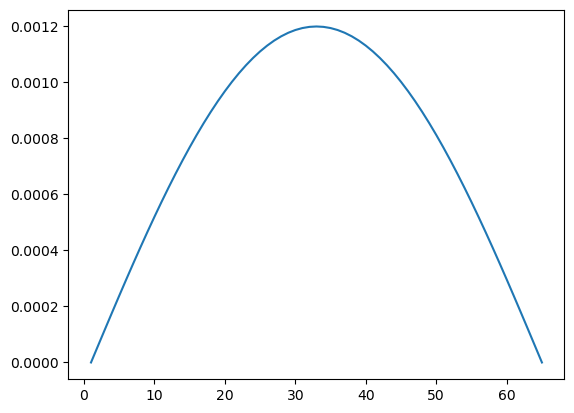

Y True = [0.00000000e+00 2.99940875e-05 5.99663181e-05 8.98953876e-05
 1.19760080e-04 1.49539701e-04 1.79213734e-04 2.08762212e-04
 2.38165288e-04 2.67403637e-04 2.96458136e-04 3.25310131e-04
 3.53941257e-04 3.82333470e-04 4.10469103e-04 4.38330811e-04
 4.65901598e-04 4.93164815e-04 5.20104164e-04 5.46703668e-04
 5.72947698e-04 5.98821061e-04 6.24308683e-04 6.49396068e-04
 6.74068957e-04 6.98313466e-04 7.22116005e-04 7.45463331e-04
 7.68342608e-04 7.90741295e-04 8.12647195e-04 8.34048522e-04
 8.54933693e-04 8.75291618e-04 8.95111414e-04 9.14382661e-04
 9.33095260e-04 9.51239344e-04 9.68805543e-04 9.85784747e-04
 1.00216814e-03 1.01794742e-03 1.03311441e-03 1.04766144e-03
 1.06158116e-03 1.07486648e-03 1.08751073e-03 1.09950756e-03
 1.11085092e-03 1.12153520e-03 1.13155507e-03 1.14090554e-03
 1.14958195e-03 1.15758009e-03 1.16489592e-03 1.17152589e-03
 1.17746671e-03 1.18271547e-03 1.18726960e-03 1.19112691e-03
 1.19428543e-03 1.19674366e-03 1.19850042e-03 1.19955480e-03
 1.19990631e-03

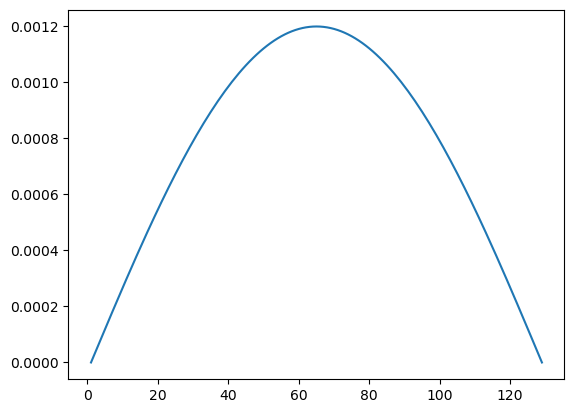

Y True = [0.00000000e+00 1.49983971e-05 2.99940875e-05 4.49842773e-05
 5.99663181e-05 7.49375904e-05 8.98953876e-05 1.04837090e-04
 1.19760080e-04 1.34661823e-04 1.49539701e-04 1.64391182e-04
 1.79213734e-04 1.94004911e-04 2.08762212e-04 2.23483134e-04
 2.38165288e-04 2.52806261e-04 2.67403637e-04 2.81955028e-04
 2.96458136e-04 3.10910604e-04 3.25310131e-04 3.39654449e-04
 3.53941257e-04 3.68168374e-04 3.82333470e-04 3.96434480e-04
 4.10469103e-04 4.24435275e-04 4.38330811e-04 4.52153618e-04
 4.65901598e-04 4.79572656e-04 4.93164815e-04 5.06675948e-04
 5.20104164e-04 5.33447368e-04 5.46703668e-04 5.59871085e-04
 5.72947698e-04 5.85931673e-04 5.98821061e-04 6.11613999e-04
 6.24308683e-04 6.36903307e-04 6.49396068e-04 6.61785220e-04
 6.74068957e-04 6.86245650e-04 6.98313466e-04 7.10270804e-04
 7.22116005e-04 7.33847352e-04 7.45463331e-04 7.56962254e-04
 7.68342608e-04 7.79602793e-04 7.90741295e-04 8.01756600e-04
 8.12647195e-04 8.23411654e-04 8.34048522e-04 8.44556344e-04
 8.54933693e-04

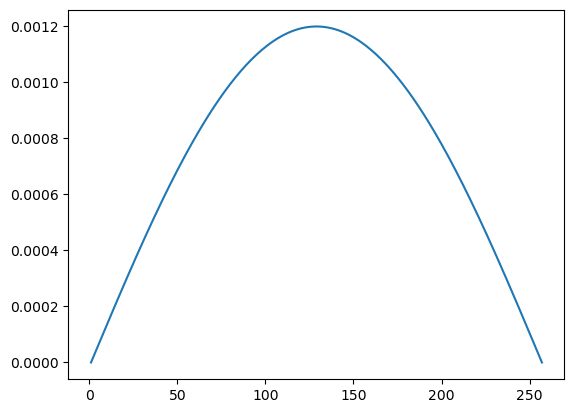

Y True = [0.00000000e+00 7.49938772e-06 1.49983971e-05 2.24967371e-05
 2.99940875e-05 3.74900119e-05 4.49842773e-05 5.24764764e-05
 5.99663181e-05 6.74534822e-05 7.49375904e-05 8.24183226e-05
 8.98953876e-05 9.73684073e-05 1.04837090e-04 1.12301059e-04
 1.19760080e-04 1.27213745e-04 1.34661823e-04 1.42103905e-04
 1.49539701e-04 1.56968861e-04 1.64391182e-04 1.71806227e-04
 1.79213734e-04 1.86613383e-04 1.94004911e-04 2.01387942e-04
 2.08762212e-04 2.16127373e-04 2.23483134e-04 2.30829202e-04
 2.38165288e-04 2.45491072e-04 2.52806261e-04 2.60110537e-04
 2.67403637e-04 2.74685241e-04 2.81955028e-04 2.89212767e-04
 2.96458136e-04 3.03690875e-04 3.10910604e-04 3.18117120e-04
 3.25310131e-04 3.32489348e-04 3.39654449e-04 3.46805173e-04
 3.53941257e-04 3.61062412e-04 3.68168374e-04 3.75258795e-04
 3.82333470e-04 3.89392109e-04 3.96434480e-04 4.03460203e-04
 4.10469103e-04 4.17460891e-04 4.24435275e-04 4.31391993e-04
 4.38330811e-04 4.45251440e-04 4.52153618e-04 4.59037081e-04
 4.65901598e-04

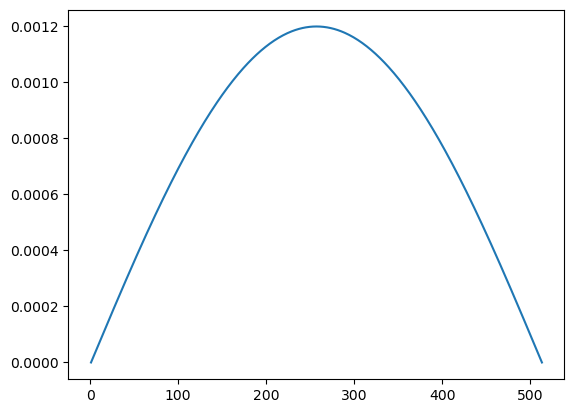

Y True = [0.00000000e+00 3.74970841e-06 7.49938772e-06 ... 7.49938772e-06
 3.74970841e-06 0.00000000e+00]

Y = [0.00000000e+00 3.74970845e-06 7.49937402e-06 ... 7.49937402e-06
 3.74970845e-06 0.00000000e+00]

Error: [0.00119991 0.00097305 0.00074619 ... 0.00074619 0.00097305 0.00119991]



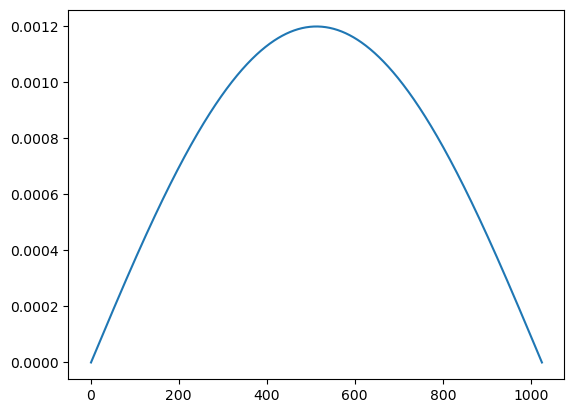

Y True = [0.00000000e+00 1.87483965e-06 3.74970841e-06 ... 3.74970841e-06
 1.87486876e-06 0.00000000e+00]

Y = [0.00000000e+00 1.87485556e-06 3.74970577e-06 ... 3.74970577e-06
 1.87485556e-06 0.00000000e+00]

Error: [0.00119991 0.00108648 0.00097305 ... 0.00097305 0.00108648 0.00119991]



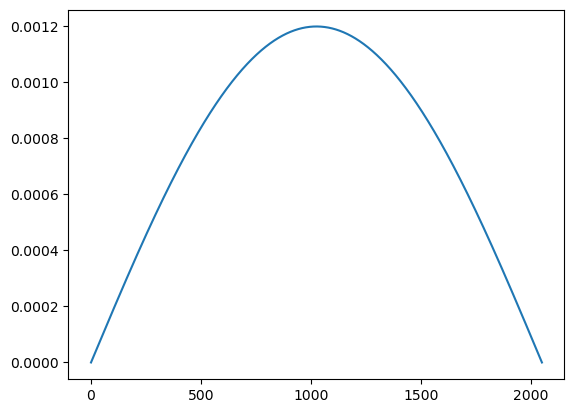

[[0.07502382]
 [0.07230178]
 [0.07162126]
 [0.07145114]
 [0.0714086 ]
 [0.07139797]
 [0.07139531]
 [0.07139465]
 [0.07139448]
 [0.07139444]]

[[5.82803151e+00]
 [2.52722292e+01]
 [1.03078900e+02]
 [4.14312875e+02]
 [1.65925058e+03]
 [6.63900187e+03]
 [2.65580071e+04]
 [1.06234028e+05]
 [4.24938113e+05]
 [1.69975445e+06]]

[[9.00000000e+02]
 [2.25000000e+02]
 [5.62500000e+01]
 [1.40625000e+01]
 [3.51562500e+00]
 [8.78906250e-01]
 [2.19726562e-01]
 [5.49316406e-02]
 [1.37329102e-02]
 [3.43322754e-03]]

[[1.11111111e-03]
 [4.44444444e-03]
 [1.77777778e-02]
 [7.11111111e-02]
 [2.84444444e-01]
 [1.13777778e+00]
 [4.55111111e+00]
 [1.82044444e+01]
 [7.28177778e+01]
 [2.91271111e+02]]


In [6]:
# max_k should be 20, keeping at 10 for testing purposes
max_k = 10

# define lists
levels = [x for x in range(1, max_k + 1)]
Errors = np.zeros((max_k,1))
KN = np.zeros((max_k,1))
h_sq_list = np.zeros((max_k,1))
h_sq_inv_list = np.zeros((max_k,1))

# loop
for k in levels:
    n = 2 ** (k + 1)
    
    # get true solution
    x = np.linspace(0,L,n+1)
    y_true = w(x)
    print("Y True =", y_true)
    print()

    # create A and b
    A, b, h_sq, h_sq_inv = setup(n)
    h_sq_list[k - 1] = h_sq
    h_sq_inv_list[k - 1] = h_sq_inv

    # Solve matrix using PA = LU Factorization and 2 Backsolves
    P, L2, U = lu(A)
    c = solve(L2, P @ b)
    y = solve(U, c)
    y = np.concatenate(([0], y, [0]))
    print("Y =", y)
    print()

    # plot solutions for k=1,2
    if k == 1 or k == 2:
        fig, ax = plt.subplots()
        x = np.arange(1, n + 2)
        plt.plot(x, y_true, label='k = {} True'.format(k))
        plt.plot(x, y, label='k = {} Approximate'.format(k))
        plt.legend()
        plt.show()
    
    # get the error
    err = np.abs(y * ((1+L)/2) - w(L/2))
    print("Error:", err)
    print()

    # plot the errors
    fig, ax = plt.subplots()
    x = np.arange(1, n + 2)
    plt.plot(x, y_true, label='k = {} Error'.format(k))
    plt.show()

    # compute middle erros and condition number
    Errors[k - 1] = err[len(err) // 2]
    KN[k - 1] = np.linalg.cond(A)

print(Errors)
print()
print(KN)
print()
print(h_sq_list)
print()
print(h_sq_inv_list)

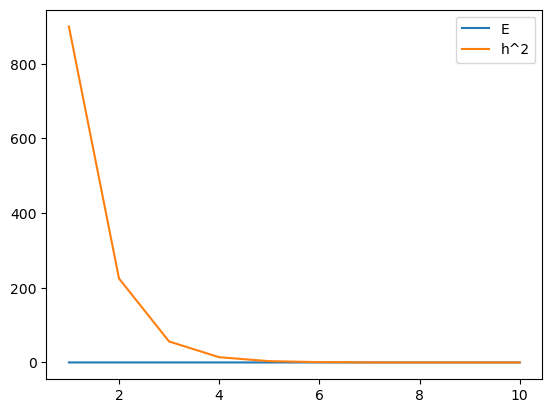

In [7]:
# verify Errors = O(h^2) 
# THIS SEEMS TO DO WHAT IT NEEDS TO DO
fig, ax = plt.subplots()
x = np.arange(1, max_k + 1)
plt.plot(x, Errors, label='E')
plt.plot(x, h_sq_list, label='h^2')
plt.legend()
plt.show()

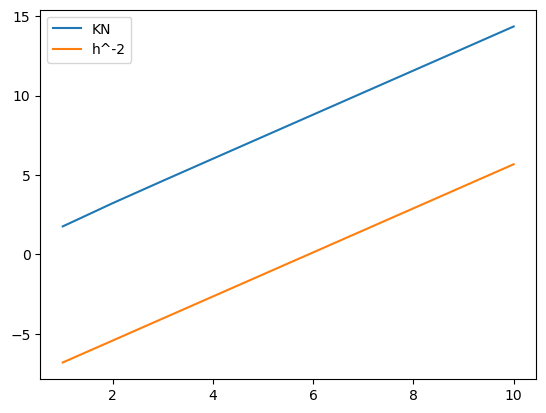

In [8]:
# verify KN = O(h^-2)
# THIS ALSO SEEMS TO WORK BUT ONLY WHEN I USE LOG()
fig, ax = plt.subplots()
x = np.arange(1, max_k + 1)
plt.plot(x, np.log(KN), label='KN')
plt.plot(x, np.log(h_sq_inv_list), label='h^-2')
plt.legend()
plt.show()